In [1]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [2]:
# 数据加载
baseA_predict = pd.read_excel('附件1 监测点A空气质量预报基础数据.xlsx', sheet_name='监测点A逐小时污染物浓度与气象一次预报数据')
baseA_real_hour = pd.read_excel('附件1 监测点A空气质量预报基础数据.xlsx', sheet_name='监测点A逐小时污染物浓度与气象实测数据')
# baseA_real_day = pd.read_excel('附件1 监测点A空气质量预报基础数据.xlsx', sheet_name='监测点A逐日污染物浓度实测数据')

baseB_predict = pd.read_excel('附件2 监测点B、C空气质量预报基础数据.xlsx', sheet_name='监测点B逐小时污染物浓度与气象一次预报数据')
baseB_real_hour = pd.read_excel('附件2 监测点B、C空气质量预报基础数据.xlsx', sheet_name='监测点B逐小时污染物浓度与气象实测数据')
# baseB_real_day = pd.read_excel('附件2 监测点B、C空气质量预报基础数据.xlsx', sheet_name='监测点B逐日污染物浓度实测数据')

baseC_predict = pd.read_excel('附件2 监测点B、C空气质量预报基础数据.xlsx', sheet_name='监测点C逐小时污染物浓度与气象一次预报数据')
baseC_real_hour = pd.read_excel('附件2 监测点B、C空气质量预报基础数据.xlsx', sheet_name='监测点C逐小时污染物浓度与气象实测数据')
# baseC_real_day = pd.read_excel('附件2 监测点B、C空气质量预报基础数据.xlsx', sheet_name='监测点C逐日污染物浓度实测数据')

In [3]:
# 转换数据格式并进行数据清洗
def change_type(dfs, df_name):
    res = []
    if df_name == 'predict':
        # 处理逐小时污染物浓度与气象一次预报数据
        for df in dfs:
            df.columns = ['模型运行日期', '预测时间', '地点', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
               '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
               '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
               'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
               'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)']

            for column_numeric in ['近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
               '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
               '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
               'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
               'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)']:
                df[column_numeric] = pd.to_numeric(df[column_numeric], errors='coerce')
                # 将负数置为0
                df[column_numeric][ df[column_numeric] < 0] = 0
            df['模型运行日期'] =  pd.to_datetime(df['模型运行日期'])
            df['预测时间'] =  pd.to_datetime(df['预测时间'])
            # 临近值填充
            df = df.fillna(method='pad')
            res.append(df)
    if df_name == 'real_hour':
        # 处理逐小时污染物浓度与气象实测数据
        for df in dfs:
            df.columns = ['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
               '气压(MBar)', '风速(m/s)', '风向(°)']

            for column_numeric in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
               '气压(MBar)', '风速(m/s)', '风向(°)']:
                df[column_numeric] = pd.to_numeric(df[column_numeric], errors='coerce')
                # 将负数置为0
                df[column_numeric][ df[column_numeric] < 0] = 0
            df['监测时间'] =  pd.to_datetime(df['监测时间'])
            # 临近值填充
            df = df.fillna(method='pad')
            res.append(df)
    if df_name == 'real_day':
        # 处理逐日污染物浓度实测数据
        for df in dfs:
            df.columns = ['监测日期', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3最大八小时滑动平均监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']
            for column_numeric in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3最大八小时滑动平均监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']:
                df[column_numeric] = pd.to_numeric(df[column_numeric], errors='coerce')
                # 将负数置为0
                df[column_numeric][ df[column_numeric] < 0] = 0
            df['监测日期'] =  pd.to_datetime(df['监测日期'])
            # 临近值填充
            df = df.fillna(method='pad')
            res.append(df)
    return res
baseA_predict, baseB_predict, baseC_predict = change_type((baseA_predict, baseB_predict, baseC_predict), 'predict')
baseA_real_hour, baseB_real_hour, baseC_real_hour = change_type((baseA_real_hour, baseB_real_hour, baseC_real_hour), 'real_hour')
# baseA_real_day, baseB_real_day, baseC_real_day = change_type((baseA_real_day, baseB_real_day, baseC_real_day), 'real_day')


In [4]:
# 去除无用数据（仅选择2020-7-20日之后的实测数据和2021-07-13 07:00:00之前的预测数据）
def extract_data(dfs, df_name):
    res = []
    if df_name == 'predict':
        for df in dfs:
            df = df.set_index(['模型运行日期'], drop=False)
            df = df.loc['2020-07-23':'2021-07-10']
            res.append(df)
    if df_name == 'real_hour':
        for df in dfs:
            df = df.set_index(['监测时间'], drop=False)
            df = df.loc['2020-07-20 00:00:00':'2021-07-12 23:00:00']
            res.append(df)
    if df_name == 'real_day':
        for df in dfs:
            df = df.set_index(['监测日期'], drop=False)
            df = df.loc['2020-07-20':'2021-07-12']
            res.append(df)
    return res
baseA_predict, baseB_predict, baseC_predict = extract_data((baseA_predict, baseB_predict, baseC_predict),df_name= 'predict')
baseA_real_hour, baseB_real_hour, baseC_real_hour = extract_data((baseA_real_hour, baseB_real_hour, baseC_real_hour), df_name='real_hour')
# baseA_real_day, baseB_real_day, baseC_real_day = extract_data((baseA_real_day, baseB_real_day, baseC_real_day), df_name='real_day')

In [5]:
# 为一次预报数据增加关联索引
from pandas.tseries.offsets import *
def time_index(dfs):
    res = []
    for df in dfs:
        df['实测时间'] = df['预测时间']
        df['实测时间'] = df['实测时间'] - DateOffset(days=3)
        new_columns = ['模型运行日期', '预测时间', '实测时间', '地点', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
                       '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
                       '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
                       'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
                       'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)']
        df = df.reindex(columns=new_columns)
        res.append(df)
    return res
baseA_predict, baseB_predict, baseC_predict = time_index((baseA_predict, baseB_predict, baseC_predict))

In [6]:
# 将实测浓度与预测值进行拼接
def concat_astime(source_dfs, concat_dfs):
    res = []
    for source_df, concat_df in zip(source_dfs, concat_dfs):
        concat_df = concat_df.set_index('监测时间', drop=False)
        source_df[['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                   'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
                   '气压(MBar)', '风速(m/s)', '风向(°)']] = np.nan
        # 拼接气象数据
        source_df = source_df.set_index('实测时间', drop=False)
        for idx, val in concat_df.iterrows():
            for column_name in ['温度(℃)', '湿度(%)','气压(MBar)', '风速(m/s)', '风向(°)']:
                source_df.at[idx, column_name] = val[column_name]
        # 拼接实测数据
        source_df = source_df.set_index('预测时间', drop=False)
        for idx, val in concat_df.iterrows():
            for column_name in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                   'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']:
                source_df.at[idx, column_name] = val[column_name]
        # 去除额外数据
        source_df = source_df.set_index(['模型运行日期'], drop=False)
        source_df = source_df.loc['2020-07-23':'2021-07-10']
        res.append(source_df)
    return res
baseA_predict, baseB_predict, baseC_predict = concat_astime((baseA_predict, baseB_predict, baseC_predict), (baseA_real_hour, baseB_real_hour, baseC_real_hour))

<AxesSubplot:>

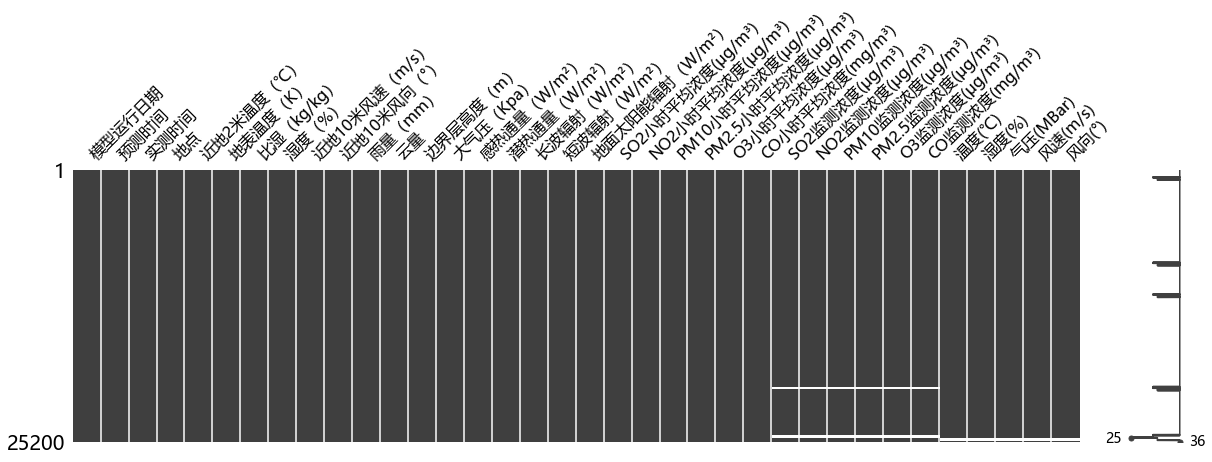

In [7]:
missingno.matrix(baseA_predict, figsize = (20,5))

<AxesSubplot:>

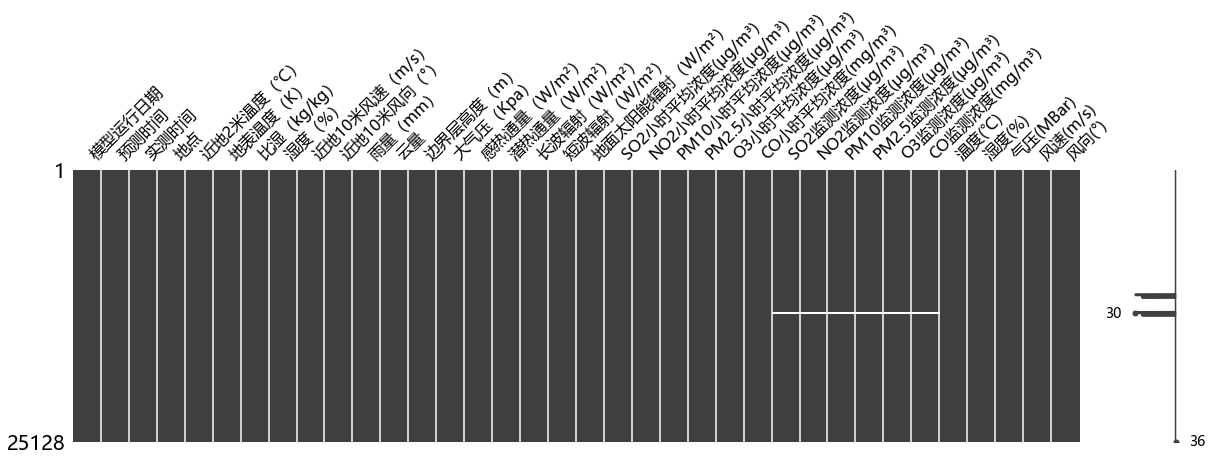

In [8]:
missingno.matrix(baseB_predict, figsize = (20,5))

<AxesSubplot:>

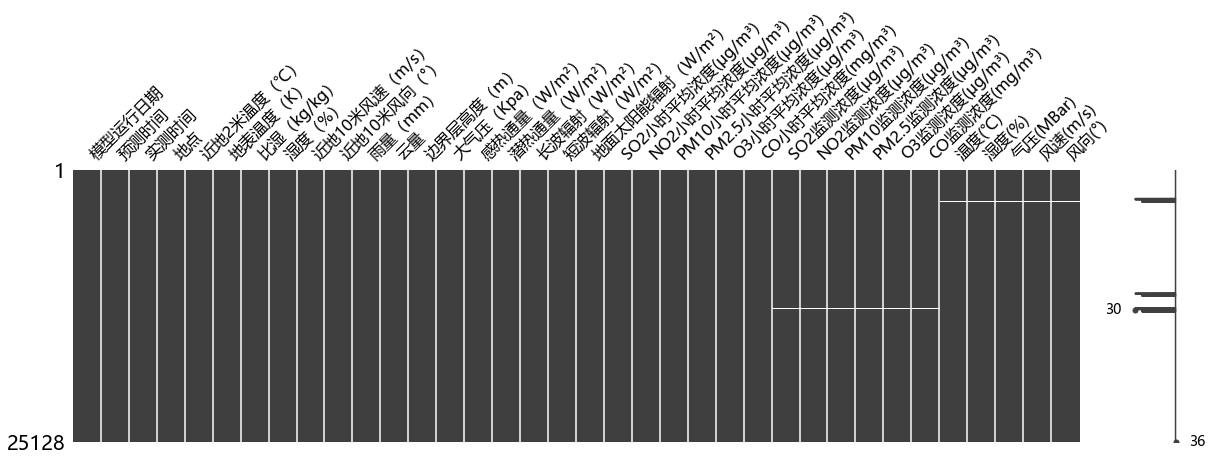

In [9]:
missingno.matrix(baseC_predict, figsize = (20,5))

In [13]:
# baseA_predict.to_excel('baseA_concated.xlsx', encoding='gbk')
# baseB_predict.to_excel('baseB_concated.xlsx', encoding='gbk')
# baseC_predict.to_excel('baseC_concated.xlsx', encoding='gbk')
baseB_predict.iloc[-100:]

,模型运行日期,预测时间,实测时间,地点,近地2米温度（℃）,地表温度（K）,比湿（kg/kg）,湿度（%）,近地10米风速（m/s）,近地10米风向（°）,...,NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
模型运行日期,,,,,,,,,,,,,,,,,,,,,
2021-07-09,2021-07-09,2021-07-10 20:00:00,2021-07-07 20:00:00,监测点B,30.1878,308.495,0.016126,55.9514,6.05842,136.624,...,8.0,13.0,7.0,31.0,0.5,28.0,88.0,1007.5,1.7,122.6
2021-07-09,2021-07-09,2021-07-10 21:00:00,2021-07-07 21:00:00,监测点B,29.7564,305.329,0.015171,54.0699,6.35320,128.195,...,8.0,16.0,6.0,30.0,0.5,28.0,89.0,1008.3,1.9,113.5
2021-07-09,2021-07-09,2021-07-10 22:00:00,2021-07-07 22:00:00,监测点B,29.4473,304.146,0.014865,54.0204,6.20109,122.989,...,8.0,18.0,6.0,32.0,0.5,28.0,89.0,1009.0,2.1,112.2
2021-07-09,2021-07-09,2021-07-10 23:00:00,2021-07-07 23:00:00,监测点B,29.1742,303.620,0.015746,58.2133,5.24587,119.474,...,6.0,14.0,5.0,29.0,0.5,28.2,88.0,1009.8,1.7,106.1
2021-07-09,2021-07-09,2021-07-11 00:00:00,2021-07-08 00:00:00,监测点B,28.9449,303.144,0.016777,62.9192,5.40677,120.467,...,6.0,14.0,5.0,30.0,0.5,28.2,88.0,1010.0,1.8,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10,2021-07-10,2021-07-12 19:00:00,2021-07-09 19:00:00,监测点B,30.8987,314.150,0.017572,58.3118,5.08423,137.542,...,10.0,23.0,4.0,37.0,0.6,31.2,73.0,1007.4,1.9,117.0
2021-07-10,2021-07-10,2021-07-12 20:00:00,2021-07-09 20:00:00,监测点B,30.7181,311.423,0.017566,58.9466,4.25731,141.920,...,12.0,19.0,5.0,34.0,0.6,29.7,80.0,1007.8,1.6,124.5
2021-07-10,2021-07-10,2021-07-12 21:00:00,2021-07-09 21:00:00,监测点B,30.0903,308.267,0.018414,64.2421,4.45240,143.167,...,7.0,19.0,4.0,47.0,0.6,29.4,80.0,1008.1,1.2,127.9


In [14]:
# 数据预处理
def dfs_clean(dfs):
    res = []
    for df in dfs:
        df = df.fillna(method='pad')
        res.append(df)
    return res
baseA_predict, baseB_predict, baseC_predict = dfs_clean((baseA_predict, baseB_predict, baseC_predict))


In [15]:
# 将数据进行融合
base_concated = pd.concat([baseA_predict, baseB_predict, baseC_predict], axis=0)

In [16]:
base_concated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75456 entries, 2020-07-23 to 2021-07-10
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   模型运行日期              75456 non-null  datetime64[ns]
 1   预测时间                75456 non-null  datetime64[ns]
 2   实测时间                75456 non-null  datetime64[ns]
 3   地点                  75456 non-null  object        
 4   近地2米温度（℃）           75456 non-null  float64       
 5   地表温度（K）             75456 non-null  float64       
 6   比湿（kg/kg）           75456 non-null  float64       
 7   湿度（%）               75456 non-null  float64       
 8   近地10米风速（m/s）        75456 non-null  float64       
 9   近地10米风向（°）          75456 non-null  float64       
 10  雨量（mm）              75456 non-null  float64       
 11  云量                  75456 non-null  float64       
 12  边界层高度（m）            75456 non-null  float64       
 13  大气压（Kpa）            75456 non

In [17]:
# 特征工程
base_concated_temp = base_concated
# 将地点进行one-hot编码
base_concated_temp = pd.get_dummies(base_concated_temp, columns={'地点'})

In [18]:
# base_concated_temp
# 相关性分析
# 构造相关性矩阵
corr_matrx = base_concated_temp.corr()[['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                   'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']]

<AxesSubplot:>

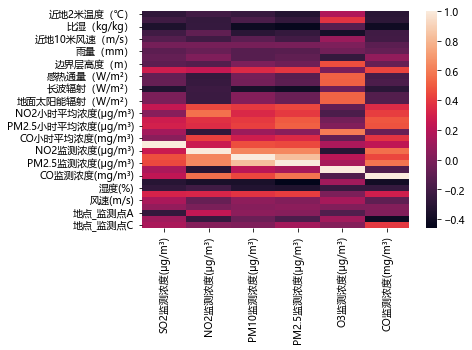

In [19]:
sns.heatmap(corr_matrx)

In [20]:
corr_matrx

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³)
近地2米温度（℃）,-0.279003,-0.208185,-0.249073,-0.320014,0.166560,-0.299226
地表温度（K）,-0.220036,-0.260534,-0.175928,-0.266374,0.376497,-0.285385
比湿（kg/kg）,-0.344123,-0.251917,-0.408662,-0.438889,-0.132475,-0.400147
湿度（%）,-0.212098,-0.097720,-0.300155,-0.257055,-0.370162,-0.214187
近地10米风速（m/s）,-0.139958,-0.215521,-0.116199,-0.207907,0.100348,-0.209618
近地10米风向（°）,-0.026763,-0.017366,-0.016989,-0.012957,0.001342,-0.119039
雨量（mm）,-0.110420,-0.071211,-0.132733,-0.129479,-0.034291,-0.081773
云量,-0.082429,0.009240,-0.131420,-0.097118,-0.256522,0.073469
边界层高度（m）,-0.115687,-0.147652,0.004443,-0.054075,0.461957,-0.075623
大气压（Kpa）,0.280811,0.248559,0.338289,0.388354,-0.005244,0.431965


In [21]:
base_concated_temp.columns

Index(['模型运行日期', '预测时间', '实测时间', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
       '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
       '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
       'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
       'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)',
       'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
       'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
       '气压(MBar)', '风速(m/s)', '风向(°)', '地点_监测点A', '地点_监测点B', '地点_监测点C'],
      dtype='object')

In [24]:
# 保留相关性强的数据
base_concated.columns
data = base_concated_temp[['模型运行日期', '预测时间', '实测时间', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
                           '近地10米风速（m/s）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
                           '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
                           'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
                           'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)',
                           'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                           'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
                           '气压(MBar)', '风速(m/s)', '地点_监测点A', '地点_监测点B', '地点_监测点C']]
data.index = range(len(data))
new_columns = ['模型运行日期', '预测时间', '实测时间', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
                           '近地10米风速（m/s）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
                           '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
                           'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
                           'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)',
                            '温度(℃)', '湿度(%)','气压(MBar)', '风速(m/s)', '地点_监测点A', '地点_监测点B', '地点_监测点C',
                           'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                           'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)',]
data = data.reindex(columns=new_columns)
data.to_excel('data.xlsx', encoding='gbk', index=False)